# Регрессионные модели

Модели обучения с учителем (или контролируемого обучения) бывают двух видов: регрессионные и классификационные. Регрессионные модели предсказывают числовые результаты, например цену, за которую будет продан дом, или количество посетителей на сайте. Его можно использовать для прогнозирования спроса, для проверки кредитных заявок, учитывая кредитные баллы, соотношение долга и дохода, соотношение стоимости кредита и займа. В любом случае, когда требуется получить числовые прогнозы, регрессионное моделирование - подходящий инструмент.
При построении регрессионной модели первым и наиболее важным решением является выбор алгоритма обучения.

На примере построения классификационной модели использовали алгоритм `к-ближайших соседей` для определения вида ириса по размерам чашелистиков и лепестков цветка.

`К-ближайших соседей` можно использовать и для регрессии, но это один из многих алгоритмов, которые можно выбрать для построения численных прогнозов. Существуют и другие алгоритмы обучения.

Сегодня рассмотрим один из распространенных алгоритмов регрессии, многие из которых могут использоваться и для классификации. Рассмотрим процесс построения регрессионной модели, предсказывающей стоимость проезда в такси на основе данных из Kaggle taxi-fares.csv. Также ознакомимся различными способами оценки точности регрессионной модели и создадим перекрестную проверку.

### Линейная регрессия

Линейная регрессия - самый простой алгоритм обучения. Он лучше всего работает с данными, которые являются относительно линейными, т. е. с наборами данных, расположенными примерно на одной прямой. Уравнение прямой в двух измерениях имеет следующий вид:

$y=mx+ b$

где т - наклон прямой, а $b$ - место пересечения прямой с осью $у$.
Набор данных "заработная плата в зависимости от стажа" хорошо поддается линейной регрессии.

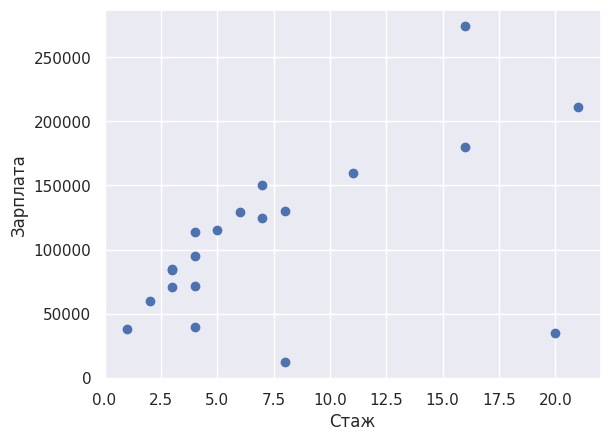

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,3,4,5,11,16,8,6,3,7,16,4,7,3,2,4,21,4,20,8])
y = 1000*np.array([38,84,114,115,160,180,130,129,85,125,274,72,150,71,60,95,211,40,35,12])
plt.scatter(x,y)
plt.xlabel('Стаж')
plt.ylabel('Зарплата')
plt.show()

In [ ]:
# step 1. Choose linear model
from sklearn.linear_model import LinearRegression
# step 2. Create a model
model = LinearRegression(fit_intercept=True) # initialize 
# step 3. shape
x.shape

(20,)

In [ ]:
X = x[:,np.newaxis]
X.shape

(20, 1)

In [ ]:
# step 4. Trainig the model
model.fit(X,y)

LinearRegression()

In [ ]:
model.coef_ # slope

array([5899.06051999])

In [ ]:
model.intercept_ # intersection point

63872.18702206686

In [ ]:
# step 5. predict
xfit = np.linspace(-1,11)
xfit.shape

(50,)

In [ ]:
xfit = xfit[:,np.newaxis]
yfit = model.predict(xfit)

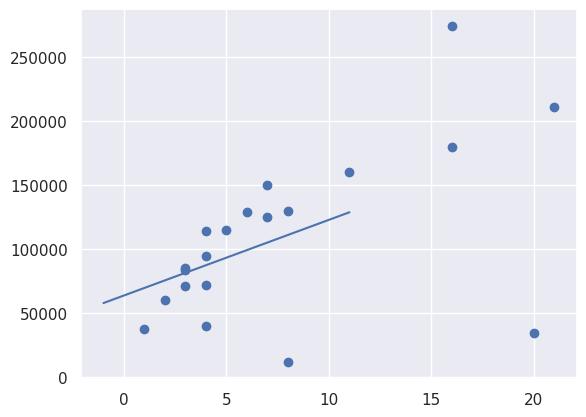

In [ ]:
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [ ]:
y = model.coef_*10+model.intercept_
y

array([122862.79222198])

На рисунке показана линия регрессии, соответствующая точкам данных. Прогнозирование зарплаты с 10-летним опытом работы сводится к нахождению точки на линии, где х = 10. Уравнение прямой таково: у= 10252х + 52968.
Подставив 10 в это уравнение для х, получим прогнозируемый доход 155 493 долларов.

### Использование регрессии для прогнозирования тарифов на такси

В службе такси многие клиенты не знают, сколько будет стоить поездка, пока она не закончится. Это связано с тем, что расстояние не единственная переменная, определяющая стоимость проезда. И Вы как программист решили создать мобильное приложение, с помощью которого клиенты, усаживаясь в такси, смогут оценить стоимость проезда. Для создания такого приложения вы должны собрать огромные массивы данных о стоимости проезда, которые компания собирала в течение многих лет. Вы будете использовать их для построения модели машинного обучения.
Давайте обучим регрессионную модель для предсказания суммы оплаты проезда с учетом времени суток, дня недели, а также места посадки и высадки пассажиров.
Mcnonbayen HaGopu paux Raggle tari-ares.csv Dan copepwur oxano 55 000 crpo ipexge yen wanonssoent
эти данные, необходимо провести подготовительную работу.

In [ ]:
import pandas as pd
df = pd.read_csv('taxi.csv')
df['pickup_datetime'].head()

,pickup_datetime
0,2013-01-13T10:23:00Z
1,2013-01-13T04:52:00Z
2,2013-01-13T10:47:00Z
3,2013-01-13T11:14:00Z
4,2013-01-13T11:24:00Z


In [ ]:
import pandas as pd

df = pd.read_csv('taxi.csv', parse_dates=['pickup_datetime'])
df.head()

,medallion,pickup_datetime,pickup_longitude,pickup_latitude,trip_time_in_secs,fare_amount,tip_amount
0,4D24F4D8EF35878595044A52B098DFD2,2013-01-13 10:23:00+00:00,-73.946457,40.772728,600,8.0,2.5
1,A49C37EB966E7B05E69523D1CB7BE303,2013-01-13 04:52:00+00:00,-73.998268,40.740414,840,18.0,0.0
2,1E4B72A8E623888F53A9693C364AC05A,2013-01-13 10:47:00+00:00,-73.953461,40.775864,60,3.5,0.7
3,F7E4E9439C46B8AD5B16AB9F1B3279D7,2013-01-13 11:14:00+00:00,-73.981369,40.724731,720,11.5,2.3
4,A9DC75D59E0EA27E1ED328E8BE8CD828,2013-01-13 11:24:00+00:00,-73.967995,40.760002,240,6.5,0.0


Узнаем количество записей и полей

In [ ]:
df.shape

(49999, 7)

Есть ли в столбцах отсутствующие значения?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   medallion          49999 non-null  object             
 1   pickup_datetime    49999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   49999 non-null  float64            
 3   pickup_latitude    49999 non-null  float64            
 4   trip_time_in_secs  49999 non-null  int64              
 5   fare_amount        49999 non-null  float64            
 6   tip_amount         49999 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(4), int64(1), object(1)
memory usage: 2.7+ MB


Название столбцов:

кеу - ключ

fare_amount - стоимость проезда

pickup_datetime - время посадки

pickup _longitude - координаты посадки (широта)

pickup _alitude - координаты посадки (долгота)

dropoff_longitude - координаты высадки (широта)

dropoff _latitude - координаты высадки (долгота)

passenger _count - количество пассажиров.


Каждая строка представляет собой поездку на такси и содержит такую информацию, как стоимость проезда, места посадки и высадки, количество пассажиров.

Удалим все строки с несколькими пассажирами и столбец Key

In [ ]:
print(df.columns)

Index(['medallion', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'trip_time_in_secs', 'fare_amount', 'tip_amount'],
      dtype='object')


In [ ]:
df = df.sample(frac=0.5)  # Keep 50% of the rows randomly
df = df.drop('medallion', axis=1)        # Remove the 'medallion' column

In [ ]:
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,trip_time_in_secs,fare_amount,tip_amount
6563,2013-03-06 15:18:42+00:00,-73.975746,40.782001,1312,16.0,3.3
48501,2013-12-07 07:49:15+00:00,0.000000,0.000000,1195,19.5,0.0
19384,2013-04-09 19:52:11+00:00,-73.995300,40.728130,351,4.5,0.0
14440,2013-04-29 14:20:00+00:00,-73.986977,40.729797,780,10.0,2.0
32233,2013-08-28 14:12:00+00:00,-73.981224,40.750134,600,7.5,1.0


В результате в наборе данных остается 25к строк

In [ ]:
df.shape

(25000, 6)

Теперь с помощью метода фп() библиотеки Pandas выясним, насколько сильно влияют входные переменные, такие как широта и долгота, на значения в столбце fare _amount

In [ ]:
corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
trip_time_in_secs,0.886479
tip_amount,0.330157
pickup_longitude,0.048395
pickup_datetime,0.016423
pickup_latitude,-0.036564


Здесь широта и долгота мало связаны со стоимостью проезда. Однако интуитивно понятно, что они должны сильно влиять на стоимость, поскольку определяют начальный и конечный пункты, а более длительные поездки требуют более высоких тарифов.
Создадим новые столбцы, которые оказывают большее влияние на результат. Их значения вычисляются из значений других столбцов. Добавим столбцы с указанием дня недели (0- понедельник (Monday), 1 - воскресенье (Sunday) и т. д.), часа дня, когда пассажира забрали (0-23), и расстояния (по воздуху, а не по улице) в милях, которое потребовала поездка. При расчете расстояний в данном коде предполагается, что большинство поездок короткие и позтому можно пренебречь кривизной Земли:

In [ ]:
#import datetime
#from math import sqrt
#просматриваем каждую строку 6 наборе
#for i, row in df.iterrows():
#df = row['pickup_datetime']
#df.at[i, 'day_of_week'] = dt.weekday() # определим день недели
#Метод at используется для быстрого доступа к элементам по меткам. dt. weekday() возвращает день недели
#Результат будет целым числом от 0 до 6, где 0 соответствует понедельнику, а 6 - воскресенью.
#df.at[i, 'pickup_time'] = dt. hour # определим бремя
#x = (row['trip_time_in_secs'] - row[' trip_time_in_secs']) * 54.6 # 1 degree = 54.6 miles
#y = (row['trip_time_in_secs'] - row[ 'trip_time_in_secs']) * 69.0 # 1 degree = 69 miles
#distance = sqrt (x2 + y2)
#df.at[i, 'distance'] = distance
#df head()

Проверим корреляцию еще раз

In [ ]:
corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
trip_time_in_secs,0.886479
tip_amount,0.330157
pickup_longitude,0.048395
pickup_datetime,0.016423
pickup_latitude,-0.036564


Посмотрим стат данные

In [ ]:
df.describe()

,pickup_longitude,pickup_latitude,trip_time_in_secs,fare_amount,tip_amount
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,-72.561942,39.810844,760.640320,12.538761,1.372370
std,10.830992,8.013988,733.664245,16.514340,2.114685
min,-77.160507,-74.009956,0.000000,0.000000,0.000000
25%,-73.992119,40.734309,374.000000,6.500000,0.000000
50%,-73.981964,40.752365,605.000000,9.500000,1.000000
75%,-73.966803,40.767501,960.000000,14.000000,2.000000
max,40.811337,41.051796,75240.000000,2069.500000,35.260000


В наборе данных присутствуют выбросы, а выбросы часто искажают результаты моделей машинного обучения.
Отфильтруйте данные, исключив отрицательные стоимости проезда и установив разумные ограничения на стоимость проезда и расстояние, а затем снова проведите корреляцию:

In [ ]:
df = df[(df['trip_time_in_secs'] > 1.0) & (df['trip_time_in_secs'] < 10.0)]
df = df[(df['fare_amount'] > 1.0) & (df['fare_amount'] < 50.0)]

corr_matrix = df.corr()
corr_matrix['fare_amount'].sort_values(ascending=False)

,fare_amount
fare_amount,1.000000
pickup_datetime,0.163106
pickup_latitude,0.099485
tip_amount,0.098504
trip_time_in_secs,0.049817
pickup_longitude,-0.101512


### Классификационные модели



Для прогнозирования стоимости проезда в такси в зависимости от расстояния поездки, дня недели и времени суток использовали несколько моделей. Регрессионные модели предсказывают числовые результаты и широко используются для прогнозирования продаж, цен, спроса и других показателей.

Классификационные модели предсказывают категориальные результаты, например, является ли операция по кредитной карте мошеннической или какую букву алфавита представляет тот или иной рукописный символ.

Большинство моделей классификации делятся на две категории: бинарные (двоичные), в которых возможны только два исхода, и мультиклассовые (многоклассовые), в которых возможны более двух исходов. В обоих случаях модель присваивает входным данным один класс, или метку класса. Реже встречаются многометочные модели классификации, которые могут классифицировать один входной сигнал как принадлежащий к нескольким классам, например предсказать, что документ является одновременно статьей по машинному обучению и статьей по лингвистике. Некоторые из них также могут предсказать, что входные данные не принадлежат ни к одному из возможных классов.

Многие алгоритмы обучения, используемые в регрессионных моделях, одинаково хорошо работают и в классификационных моделях. Существенное различие между регрессией и классификацией заключается в способе измерения точности модели.

Для классификационной модели не существует такого понятия, как показатель R- Вместо него применяется показатели, такие как точность (precision), полнота (recall), специфичность (specificity), чувствительность (sensitivit), Ft-мера (Fl score) и др.

#### Логистическая регрессия

Для решения задач классификации существует множество алгоритмов обучения. Например, алгоритмы деревья решений, случайные леса и градиентный бустинг можно использовать и для классификации. В билбиотеке Scikit
имеются классы, как Pecision TreeClassifier, RandomForest Classifier Gra dienBosting Classifier. Мы использовали класс
обучения.

Эти алгоритмы обучения используются во многих современных моделях машинного обучения. Но одним из самых популярных алгоритмов классификации является логистическая регрессия, которая анализирует распределение данных и подбирает под него уравнение, определяющее вероятность принадлежности данной выборки к каждому из двух возможных классов.



#### Бинарная классификация



Бинарные классификаторы - это модели обучения с контролем, обучаемые на помеченных данных нули для отрицательного класса и единицы для положительного. Прогнозы, которые они делают, тоже имеют значения 0 и 1.